In [169]:
import itertools

# Plotting the Confusion Matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

matplotlib.rc('figure', figsize=(11, 11))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Matriz de confusão:
Confusion matrix, without normalization
              precision    recall  f1-score   support

         1.0       0.69      0.75      0.72        12
         2.0       0.64      0.70      0.67        10
         3.0       1.00      1.00      1.00        10
         4.0       0.50      0.62      0.56         8
         5.0       0.79      0.92      0.85        12
         6.0       0.75      0.75      0.75         8
         7.0       0.60      0.60      0.60        10
         8.0       1.00      1.00      1.00        11
         9.0       0.73      0.79      0.76        14
        10.0       0.80      0.92      0.86        13
        11.0       0.84      1.00      0.91        16
        12.0       0.60      0.50      0.55        12
        13.0       0.67      0.62      0.64        13
        14.0       0.44      0.67      0.53        12
        15.0       1.00      0.90      0.95        10
        22.0       0.90      0.75      0.82        12
        23.0       1.

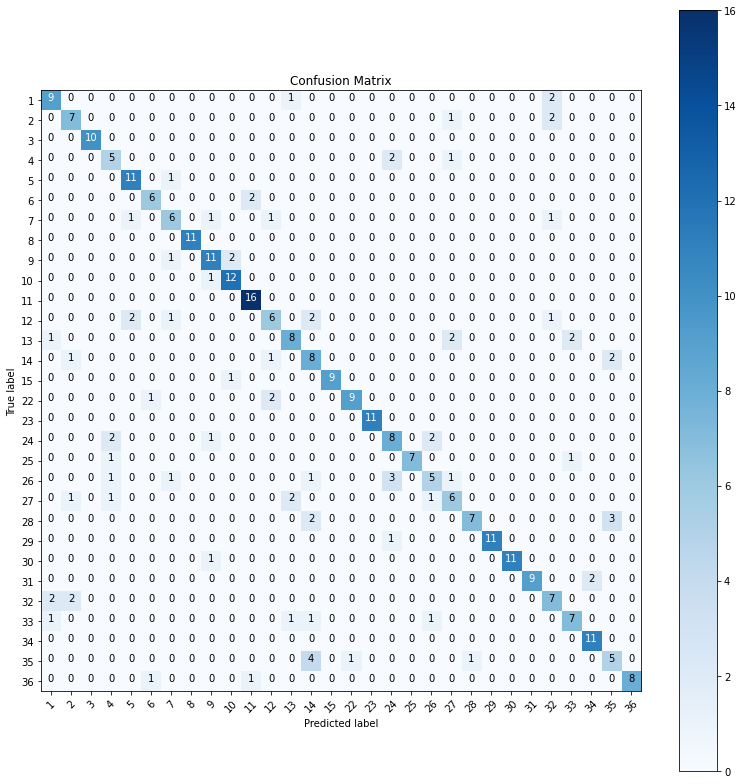


Resultados baseados em Holdout 70/30
Taxa de acerto = 0.65 

Resultados baseados em Validacao Cruzada
Qtde folds: 5:
Taxa de Acerto: 0.75
Pior Folha percent:Folha [ 26 ]  valor [ 41.666666666666664% ]
Pior Folha value:Folha [ 26 ]  valor [ -2 ]
Desvio padrao: 0.04
Matriz de confusão:
Confusion matrix, without normalization
              precision    recall  f1-score   support

         1.0       0.69      0.75      0.72        12
         2.0       0.67      0.80      0.73        10
         3.0       1.00      1.00      1.00        10
         4.0       0.44      0.50      0.47         8
         5.0       0.79      0.92      0.85        12
         6.0       0.75      0.75      0.75         8
         7.0       0.60      0.60      0.60        10
         8.0       1.00      1.00      1.00        11
         9.0       0.73      0.79      0.76        14
        10.0       0.80      0.92      0.86        13
        11.0       0.84      1.00      0.91        16
        12.0       0.60  

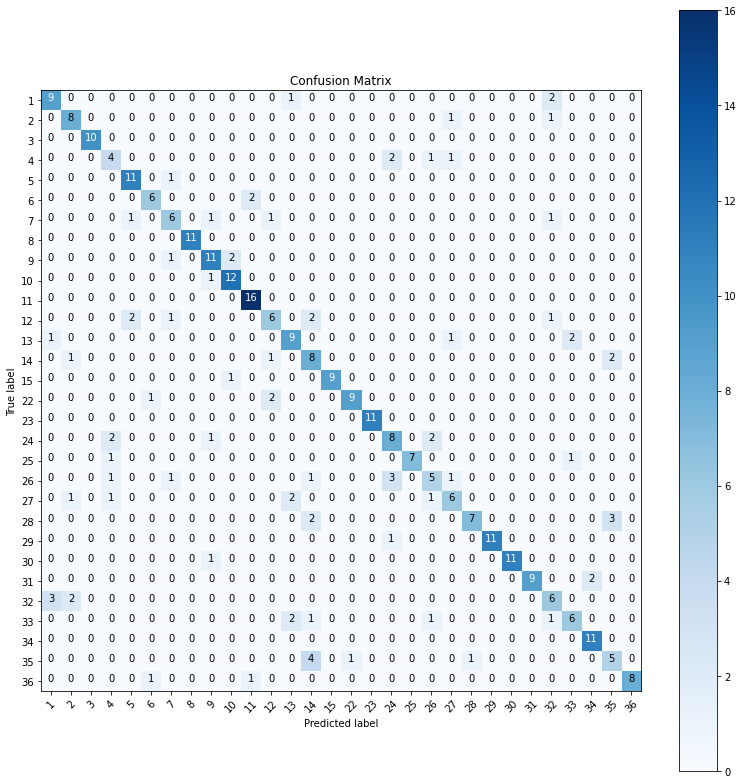

In [214]:
# Este exemplo carrega a base Wine da UCI, treina uma Arvore de decisao usando 
# holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias 
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report

# Carregando a base de dados Leaf
import pandas as pd

df = pd.read_csv(r'leaf.csv', delimiter=',', header=None)
dataset = df.to_numpy()
X = dataset[:, 2:16]
y = dataset[:, 0]

# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

# declara o classificador
clfa = tree.DecisionTreeClassifier()

# treina o classificador
clfa = clfa.fit(X_train, y_train)

# testa usando a base de testes
predicted = clfa.predict(X_test)

# calcula a acuracia na base de teste (taxa de acerto)
score = clfa.score(X_test, y_test)

# calcula a matriz de confusao
matrix = confusion_matrix(y_test, predicted)

# apresenta os resultados
print("\nResultados baseados em Holdout 70/30")
print("Taxa de acerto = %.2f " % score)

#===================================================================

# EXEMPLO USANDO VALIDACAO CRUZADA
clfb = SVC()


#Definição dos parâmetros a serem avaliados no ajuste fino do SVM
parameters = [
    {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['linear']},
    {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
]
# clfb = tree.DecisionTreeClassifier(splitter="best", criterion='entropy', min_samples_split=8) # arvore
# clfb = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')                           # knn
# clfb = GaussianNB(var_smoothing=0.0000000000001)                                              # naive bayes
clfb = GridSearchCV(clfb, parameters, scoring = 'accuracy', cv=5)                               # svm



folds = 5
result = model_selection.cross_val_score(clfb, X, y, cv=folds)

def PiorFolha():
    dic_percent = {}
    dic = {}
    main = 0
    for line in cm:
        acc = 0
        acerto = line[main]
        for l in line:
            acc += l
        total = acc
        erro = acc - acerto
        leaf = cm_plot_labels[main]
        # print(f'leaf:{leaf}: || {acerto} | {erro} ||')
        # print(f'leaf:{leaf} | {acerto * 100 / total}')
        dic_percent[leaf] = acerto * 100 / total
        dic[leaf] = acerto - erro
        main += 1
    # print('-'*99)
    lower = 0
    var_result = ''
    for i in dic:
        value = dic[i]
        if value <= lower:
            lower = dic[i]
            var_result = "Folha [ " + str(i) + ' ]  valor [ ' + str(dic[i]) + ' ]'

    result_percent = ''
    lower_percent = 100
    for k in dic_percent:
        value = dic_percent[k]
        if value <= lower_percent:
            lower_percent = dic_percent[k]
            result_percent = "Folha [ " + str(k) + ' ]  valor [ ' + str(dic_percent[k]) + '% ]'
    print("Pior Folha percent:" + result_percent)
    print("Pior Folha value:" + var_result)


print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
PiorFolha()

print("Desvio padrao: %.2f" % result.std())

# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm = confusion_matrix(y, Z)
print("Matriz de confusão:")
cm_plot_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '22', '23', '24',
                  '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

#prints classification_report
print(classification_report(y, Z))

#returns a dict, which you can easily sort by prediction
report = classification_report(y, Z, output_dict=True)
report_results = {k: v for k, v in report.items() if isfloat(k)}
sort = dict(sorted(report_results.items(), key=lambda item: item[1]['precision']))
print(f"a pior foi a folha {list(sort.keys())[0]}, com precisão de {list(sort.values())[0]['precision']}")


